In [2]:
import sys
sys.path.append('e:\solar flares\data\\2017-09-06')
import numpy as np
import matplotlib.pyplot as plt
import use_nessi as un
import use_nessi2 as un2
from importlib import reload


In [3]:
reload(un)
import voight_fit as vf
reload(un2)
reload(vf)

lines = ["Ha14"]
long_names = {"Ha14":r"H$\alpha$", "CaK17":r'Ca$IIK$', "CaII17":r'Ca$II 8542 \AA$'}


data = un.load_for_further_analysis(lines)

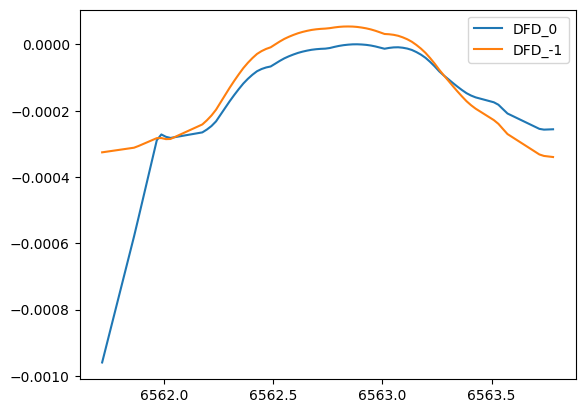

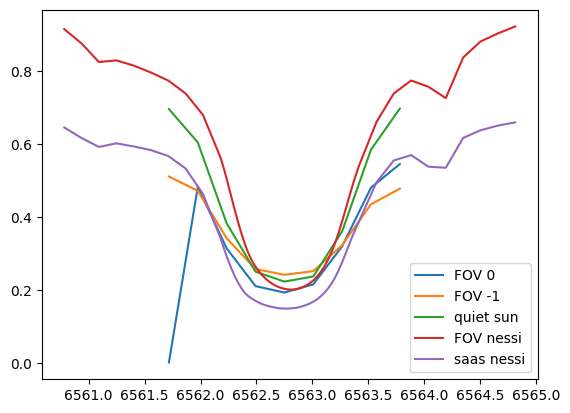

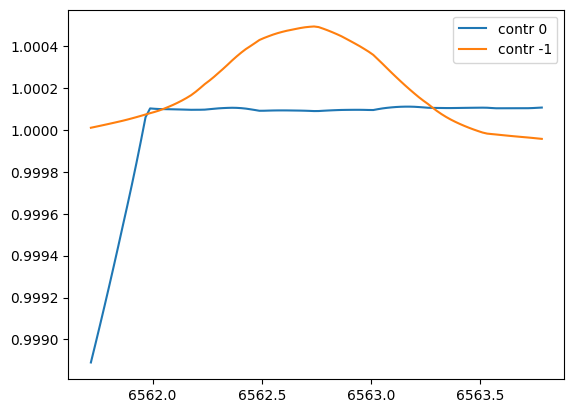

In [4]:
un2.test_contrast(data, "Ha14")

The average is 1.0000717689469825
[ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30]
At frame 0 the voight fitting was not succesfull and average guess ([ 2.31851890e-05  6.56264523e+03  4.39313799e-01 -5.39156140e-01]) is used as params and as std of params. 
At frame 3 the voight fitting was not succesfull and previous params are used. 
At frame 5 the voight fitting was not succesfull and previous params are used. 
At frame 6 the voight fitting was not succesfull and previous params are used. 
param_fit[-1] = (array([ 1.88403480e-05,  6.56267991e+03,  6.47632254e-01, -9.80440295e-01]), array([1.05905044e-06, 7.59261587e-02, 4.56510704e+01, 3.10346518e+01])). Here comes the plot:


c:\Users\Gebruiker\Anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


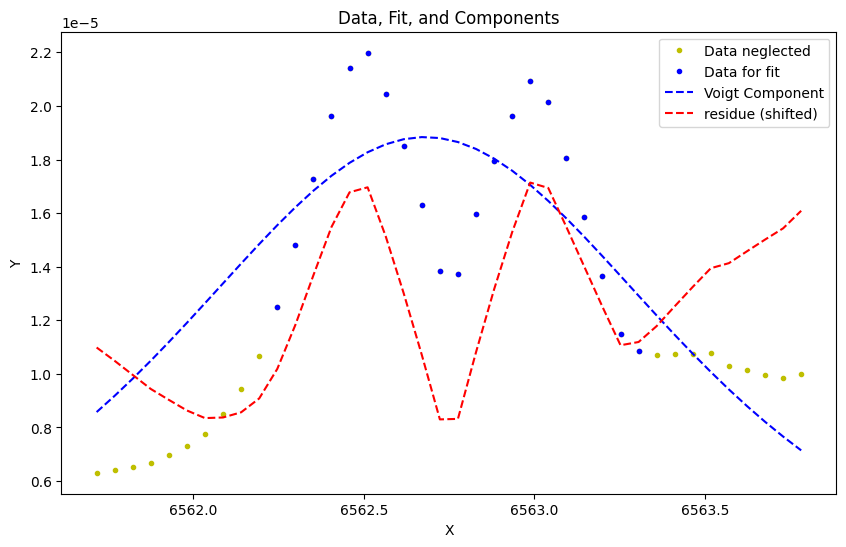

At frame 67 the voight fitting was not succesfull and previous params are used. 
param_fit[-1] = (array([2.17750971e-05, 6.56239772e+03, 2.09630444e-01, 4.78130602e-04]), array([4.53467302e-06, 5.42177535e-02, 5.68406583e-02, 2.43594780e+02])). Here comes the plot:


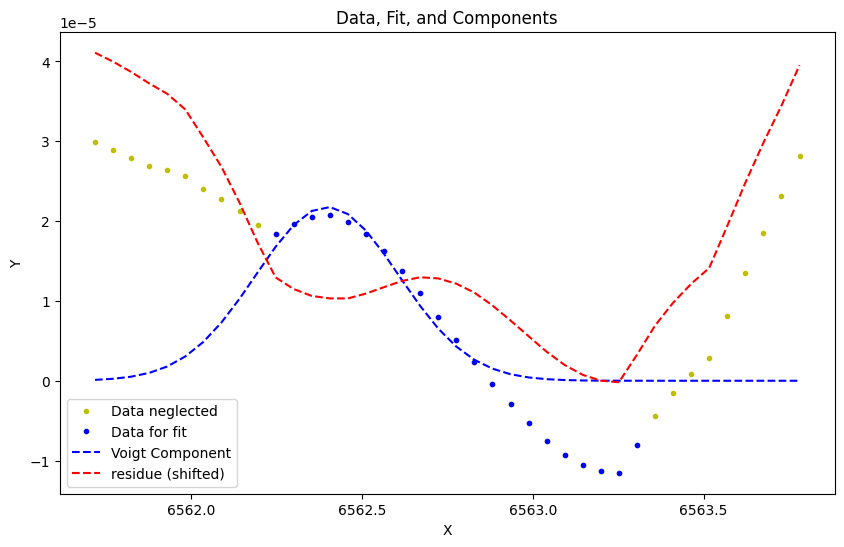

param_fit[-1] = (array([7.53191295e-05, 6.56267276e+03, 4.32973332e-01, 5.46523417e-01]), array([2.95787475e-06, 2.08907294e-02, 1.55341773e+00, 1.50358221e+00])). Here comes the plot:


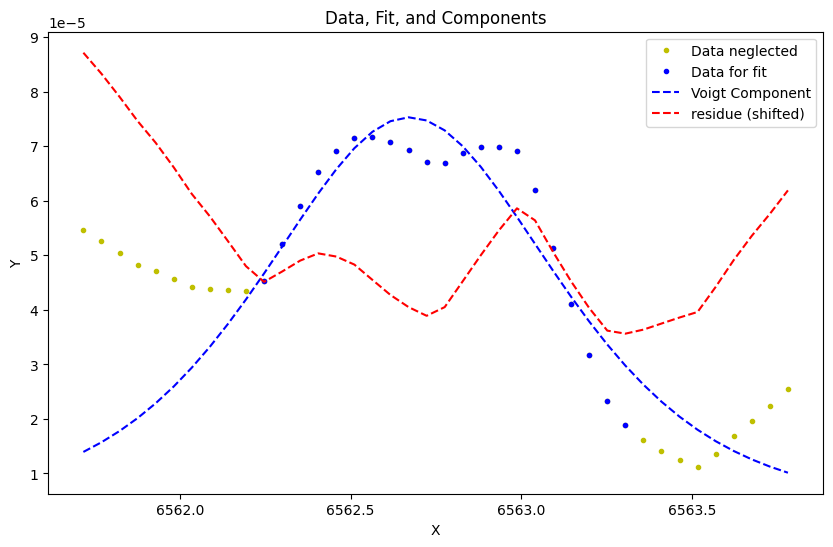

param_fit[-1] = (array([ 1.60923214e-04,  6.56269097e+03,  3.77624137e-01, -1.84408120e-04]), array([1.64507966e-04, 7.15913000e-03, 9.07675369e-03, 3.94293876e+02])). Here comes the plot:


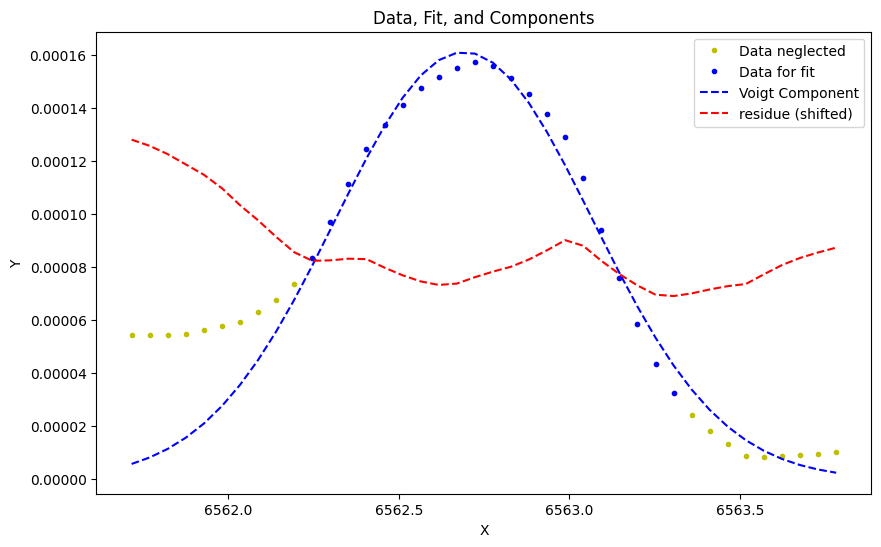

param_fit[-1] = (array([2.84297138e-04, 6.56271736e+03, 3.92945349e-01, 4.84529374e-01]), array([6.82147038e-06, 1.02618498e-02, 6.66040241e-01, 6.86012105e-01])). Here comes the plot:


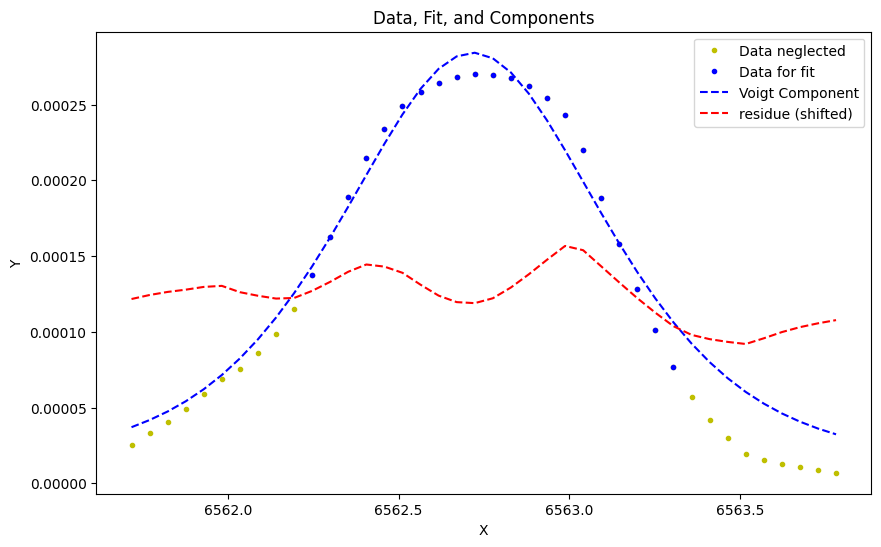

param_fit[-1] = (array([3.59700168e-04, 6.56271591e+03, 3.84751091e-01, 4.65268001e-01]), array([8.25382273e-06, 9.35781298e-03, 5.22836949e-01, 5.64711630e-01])). Here comes the plot:


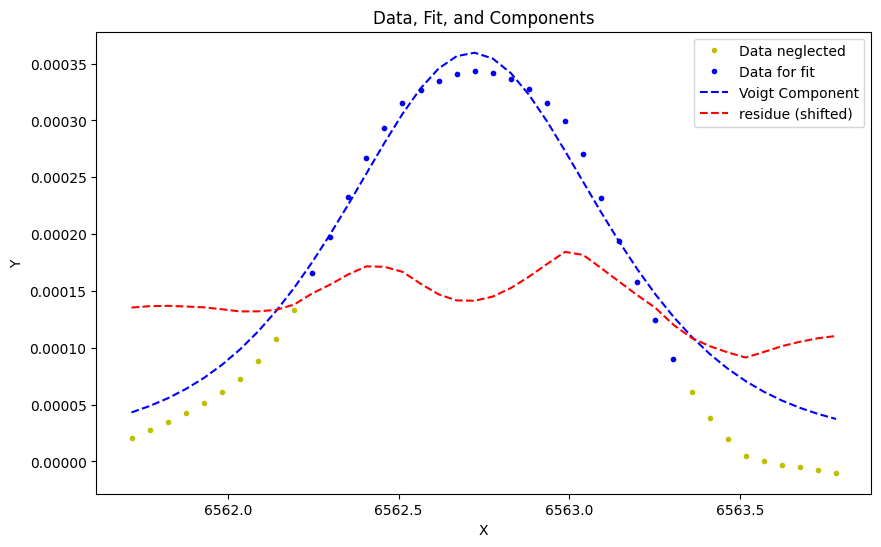

(270, 4)
(270, 4)
(270, 4)
(270, 4)
it is smoothent
vmax = 4.399102464187353e-05, vmin = -2.3299469441304167e-05


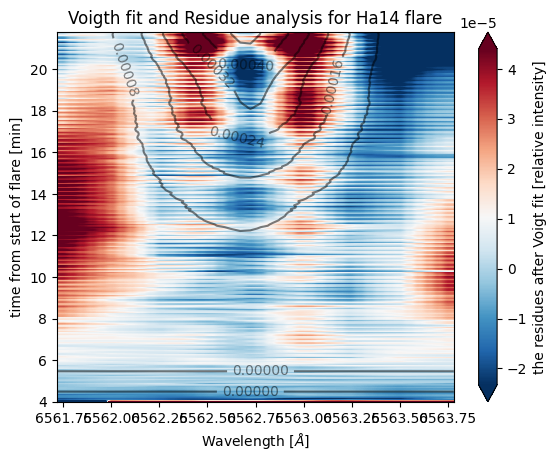

In [17]:
off = 0
reload(vf)
lnp = [0,1,2,3,4,5,6,7,8,9,-9,-8,-7,-6,-5,-4,-3,-2,-1]

vf.make_analysis('Ha14', data,[ 2.31851890e-05,  6.56264523e+03,  4.39313799e-01, -5.39156140e-01], 
              plot_rate=40, offset=off, neglect_points=lnp)

In [9]:
def save_voight_fits(name, params, res):
    fname = f"fit_data/voight_data_{name}.npz"
    np.savez(fname, params, res)
    
def load_voight_fits(name):
    fname = f"fit_data/voight_data_{name}.npz"
    arr = np.load(fname)
    print(arr)
    param = arr['arr_0']
    res = arr['arr_1']
    return param, res

def smooth_voight_param_in_time(param):
    pass

from scipy.signal import savgol_filter

def smooth(data):
    windowlength = 5
    return savgol_filter(data, windowlength, 3, axis = 0)


def create_gaussian_kernel(n, m, sigma):
    """
  Creates a 2D Gaussian distribution over an n x m matrix.

  Args:
      n: Number of rows in the matrix.
      m: Number of columns in the matrix.
      sigma: Standard deviation of the Gaussian distribution.

  Returns:
      A numpy array representing the Gaussian distribution.
  """
    x, y = np.meshgrid(np.arange(m), np.arange(n))
    mu_x = m // 2
    mu_y = n // 2
    return np.exp(-((x - mu_x) ** 2 + (y - mu_y) ** 2) / (2 * sigma**2))

def smooth2(data, n_wav=2, n_time=5, mode='same'):
    """
    Smooths a NumPy array by averaging over n neighbors.

    Args:
        data: A NumPy array of any shape.
        n: The number of neighbors to average over.

    Returns:
        A new NumPy array with the same shape as the input data,
        containing the smoothed values.
    """
    from scipy.signal import convolve2d
    
    sigma = 0.4*n_wav
    kernel = create_gaussian_kernel(n_time, n_wav, sigma)
    print(kernel.shape)
    kernel /= np.sum(kernel)
    sum_kernel = np.sum(kernel)
    return convolve2d(data, kernel, mode=mode)

In [10]:
import use_nessi as un
data = un.load_for_further_analysis(['Ha14']) #load_for_further_analysis(names_of_lines, full_path=None)
print(data.keys())
wav = data['quiet_sun_Ha14'][0]
print(wav)

param, res = load_voight_fits('Ha14')
param.shape, res.shape

dict_keys(['area_theta_Ha14', 'FOV_Ha14', 'quiet_sun_Ha14', 'nessi_Ha14', 'TIME_Ha14'])
[6561.71737583 6561.97537584 6562.23337586 6562.49137587 6562.74937589
 6563.00737591 6563.26537592 6563.52337594 6563.78137595]
NpzFile 'fit_data/voight_data_Ha14.npz' with keys: arr_0, arr_1


((270, 2, 4), (270, 40))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


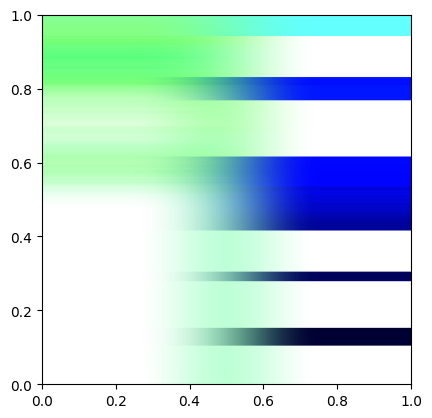

(270, 4)
(270, 4)


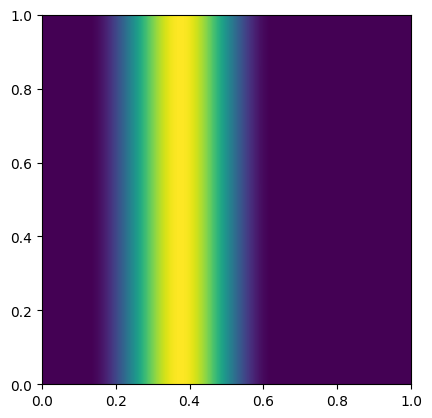

(270, 100)


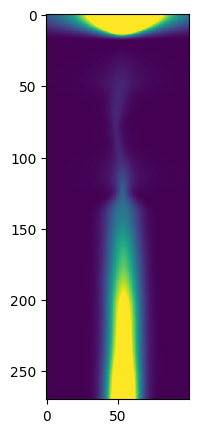

In [12]:
def complete_rolling_average(param, k=7):
    kernel = np.ones(k) / k
    print(np.shape(param))
    pre = np.array([param[0] for _ in range((k-1)//2) ])
    aft = np.array([param[-1] for _ in range((k)//2)])
    param = np.concatenate( (pre ,  param, aft))
    param = np.array([np.convolve(param[:, i], kernel, mode='valid') for i in range(4) ]).T
    print(np.shape(param))
    return param

wav = np.linspace(6560, 6565, 100)
plt.imshow(param, extent=(0,1,0,1))
plt.show()
param2 = complete_rolling_average(param[:,0,:],k=8)
plt.imshow(param2, extent=(0,1,0,1))
plt.show()

y_voigt = np.array([vf.voigt(wav, popt[0], popt[1], popt[2], popt[3]) for popt in param2])
print(y_voigt.shape)

fig, ax = plt.subplots(1, figsize=(5,5)) 
ax.imshow(y_voigt, vmin=np.percentile(y_voigt, 3), vmax=np.percentile(y_voigt, 95))
plt.show()


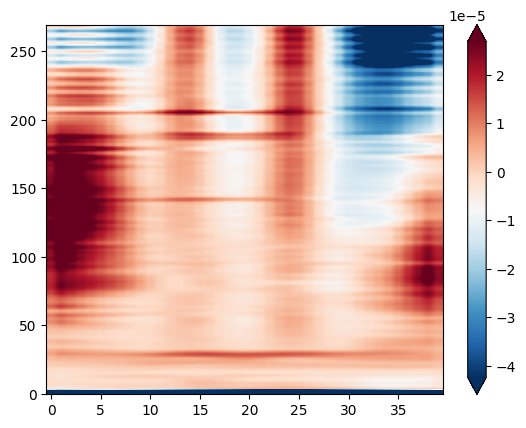

In [101]:
fig, ax = plt.subplots(1,1) 
c = ax.imshow(np.array(res), aspect="auto", cmap='RdBu_r', origin='lower', vmin=np.percentile(res, 3), vmax=np.percentile(res, 97))
cb = fig.colorbar(c, ax=ax, extend='both')